In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive
%cd model
%cd clean_code
!pwd
!pip install -r Requirements.txt


/content/drive/MyDrive
/content/drive/MyDrive/model
/content/drive/MyDrive/model
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/model/clean_code


Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn


(1916, 1437, 3) 1
(1816, 1337, 3) ooooo
fpc
(1916, 1437, 3) uuuu [25 23 43]
(1916, 1437, 3) ooooo
[803, 2182, 3397, 4394] mid


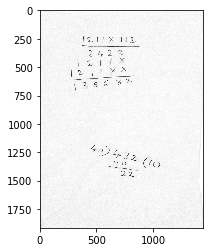

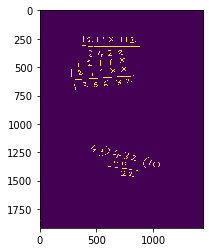

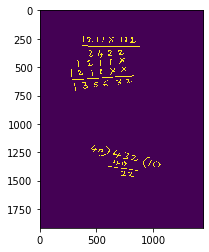

45 bblen
{0: [(773, 1422, 61, 45), (708, 1413, 43, 48), (591, 1369, 267, 43), (989, 1331, 67, 52), (717, 1330, 41, 37), (949, 1316, 32, 52), (643, 1311, 57, 53), (903, 1289, 62, 98), (794, 1275, 65, 51), (722, 1251, 59, 60), (639, 1227, 72, 75), (511, 1218, 42, 34), (514, 1193, 97, 93), (442, 1187, 63, 61)], 1: [(300, 644, 15, 64), (363, 633, 55, 58), (471, 628, 48, 52), (556, 615, 44, 57), (663, 610, 51, 47), (750, 603, 55, 37), (247, 574, 578, 45), (330, 527, 48, 45), (450, 523, 16, 56), (271, 521, 11, 70), (529, 519, 11, 44), (614, 508, 47, 59), (708, 496, 49, 53), (413, 442, 50, 50), (524, 439, 10, 52), (327, 435, 13, 63), (616, 428, 13, 55), (691, 417, 51, 55), (591, 350, 50, 53), (505, 350, 49, 69), (425, 350, 42, 61), (683, 349, 57, 45), (367, 309, 508, 17), (411, 237, 54, 48), (789, 235, 49, 56), (748, 235, 13, 49), (710, 235, 12, 50), (602, 234, 44, 53), (499, 234, 11, 48), (547, 231, 12, 56), (374, 230, 12, 54)]} [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

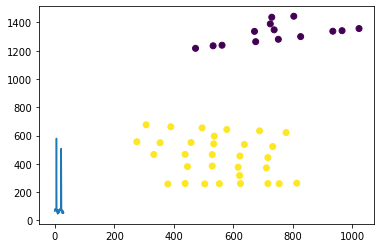


[False, False, False, False, False, False] conditions
True rrf
[False, False, False, False, False, False] conditions
[False, False, False, False, False, False] conditions
True
mul
['2422', '12110', '121100', '135632'] exp_lines ['2422', '12110', '121100', '135632']
270.44038160008574 2


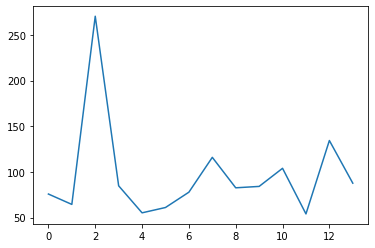

[False, False, False, False, False, False] conditions
True rrf
[False, False, False, False, False, False] conditions
[False, False, False, False, False, False] conditions
True
div
['40)432(10', '40', '32'] exp_lines


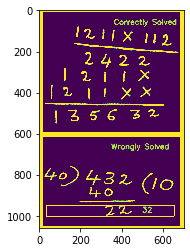

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import crop
import paper
import find_problems
import getlines
import lines_evalution
import label_image as out_img_manipulate


img=cv2.imread("test.jpg")
print(img.shape,"1")
img=crop.remove_background(img)
img_list=find_problems.problems(img)
out_img_list=[]
for n in range(len(img_list)):
    img=paper.rotate(img_list[n][0])
    lines=getlines.extract_lines(img)
    cr,y_margin=getlines.extract_characters(lines,img)
    valid,wrong_lines=lines_evalution.evaluate(cr,y_margin)
    if(valid is False):
        img=out_img_manipulate.invalidImage(img)
        # out_img_list.append(img)
    elif(len(wrong_lines)==0):
        img=out_img_manipulate.correctImage(img)
        out_img_list.append(img)
    else:
        img=out_img_manipulate.wrongImage(img,wrong_lines)
        out_img_list.append(img)
img=out_img_manipulate.combine_images(out_img_list)
plt.imshow(img)
plt.show()

In [4]:
cv2.imwrite("final_out.jpg",img)
print(cr)
print(y_margin)

[['4', '0', ')', '4', '3', '2', '(', '1', '0'], ['4', '0'], ['2', '2']]
[(81, 218), (184, 235), (271, 324)]


In [7]:
import scipy
img=cv2.imread("test.jpg")
scipy.ndimage.measurements.center_of_mass(img)

(964.9142697512852, 680.1072476930335, 1.043066733316106)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), (303, 19, 824, 576))


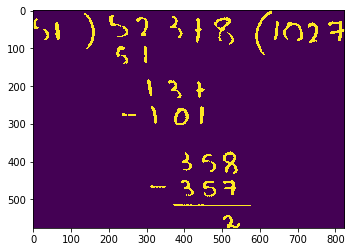

In [4]:
print((img_list[0]))
plt.imshow(img_list[0][0])
plt.show()